# Wine Quality Prediction - UTS ML
# Yazid Ahmad Hisyam
# 4112322013

# Import Library
Import semua library yang dibutuhkan untuk pemrosesan data, visualisasi, preprocessing, pelatihan model, dan evaluasi.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset
Membaca dataset training dan testing dari file CSV, lalu melihat 5 data pertama.

In [2]:
df_train = pd.read_csv('data_training.csv')
df_test = pd.read_csv('data_testing.csv')

df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918


Melihat struktur data (jumlah kolom, tipe data, non-null).

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


Menampilkan ringkasan statistik (mean, std, min, max, dll) untuk masing-masing fitur.

In [4]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


Mengecek jumlah data yang hilang/null di tiap kolom dataset training dan testing.

In [5]:
# Data Training
missing_values = df_train.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
# Data Testing
missing_values = df_test.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Id                      0
dtype: int64

# Visualisasi Distribusi Kelas

Menampilkan grafik distribusi nilai quality pada data training (sebelum dibinerisasi).

C:\Users\yazid\AppData\Local\Temp\ipykernel_22284\1440407753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_train, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

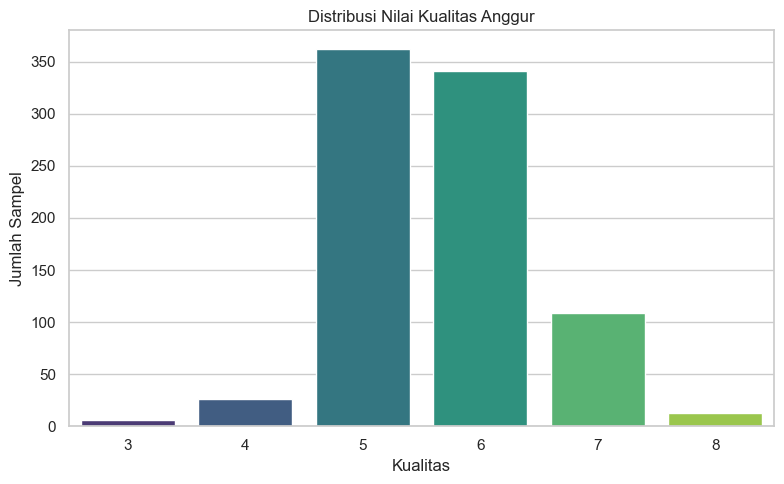

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df_train, palette='viridis')
plt.title('Distribusi Nilai Kualitas Anggur')
plt.xlabel('Kualitas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

In [8]:
# Salin agar dataframe data asli tetap utuh
df_train_binary = df_train.copy()
df_test_binary = df_test.copy()

# Ubah quality menjadi biner : 0 rendah (<=5), 1 = tinggi (>=6)
df_train_binary['quality'] = (df_train_binary['quality'] >= 6).astype(int)

# Cek distribusi setelah binerisasi
quality_counts = df_train_binary['quality'].value_counts()
quality_counts

quality
1    463
0    394
Name: count, dtype: int64

# Split Data Training, Validasi dan Normalisasi Data

In [9]:
# Pisahkan fitur dan target
X = df_train_binary.drop(columns=['quality', 'Id'])
y = df_train_binary['quality']

# Bagi data menjadi training dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Training Random Forest dan Evaluasi Model

Melatih model Random Forest menggunakan data training yang sudah dinormalisasi.

Melakukan prediksi pada data validasi, menghitung confusion matrix dan classification report.

In [10]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_val_scaled)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred, output_dict=True)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        79
           1       0.80      0.78      0.79        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



# Prediksi Data Test

Melakukan preprocessing pada data test dan prediksi menggunakan model yang telah dilatih.

In [11]:
X_test =  df_test.drop(columns=['Id'])
X_test_scaled = scaler.transform(X_test)

test_predictions = rf.predict(X_test_scaled)

df_test_results = df_test.copy()
df_test_results['predicted_quality'] = test_predictions

df_test_results[['Id','predicted_quality']].head()

,Id,predicted_quality
0,222,0
1,1514,1
2,417,0
3,754,0
4,516,1


# Simpan Hasil Prediksi

Menambahkan hasil prediksi ke dataframe test dan menyimpannya ke file CSV.

In [12]:
df_test_results[['Id','predicted_quality']].to_csv('hasilprediksi_013.csv', index=False)